### Part 1: Plot the phi dihedral angle in VMD, GROMACS, and PLUMED

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('vmd_sarah',delimiter = '\t', names=['time','phi'])
data2=pd.read_csv('phiALA2.xvg',delimiter = ' ', skiprows=16, skipinitialspace=True, names=['time','phi'])
data3=pd.read_csv('PLUMED_PHI',delimiter = ' ',skiprows=3, skipinitialspace=True, names=['time','phi'])
data4=pd.read_csv('MATHEVAL_PHI',delimiter = ' ',skiprows=1, skipinitialspace=True, names=['time','phi'])

In [3]:
new = []
time = data.time
for each in data.phi:
    new.append(math.radians(each))

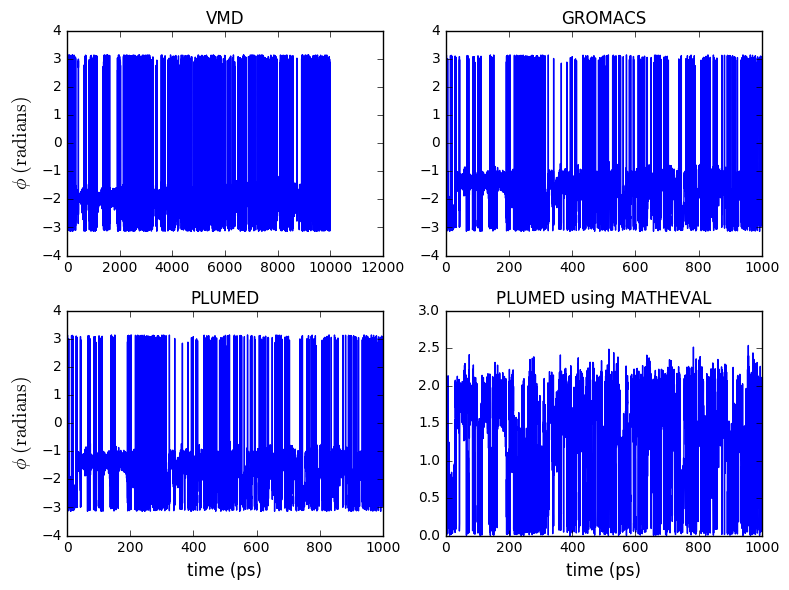

In [4]:
plt.figure(figsize=(8,6))

plt.subplot(221)
plt.plot(time,new)
plt.ylabel('$\mathrm{\phi \ (radians)}$',fontsize=14)
plt.title('VMD')

plt.subplot(222)
plt.plot(data2.time,data2.phi)
plt.title('GROMACS')

plt.subplot(223)
plt.plot(data3.time,data3.phi)
plt.title('PLUMED')
plt.ylabel('$\mathrm{\phi \ (radians)}$',fontsize=14)
plt.xlabel('time (ps)',fontsize=12)

plt.subplot(224)
plt.plot(data4.time,data4.phi)
plt.title('PLUMED using MATHEVAL')
plt.xlabel('time (ps)',fontsize=12)
plt.xlim(0,1000)

plt.tight_layout()
plt.show()

Important to note: Plumed using Matheval was calculated from 0 to pi

### Well-Tempered Metadynamics: A smoothly converging and Tuneable Free Energy Method 
Alessandro Barducci, Giovanni Bussi, Michele Parinello

#### Question 1: How does this differ from standard MetaD?

Well-tempered MetaD is a scheme of metadynamics that uses an <b>adaptive</b> bias to estimate the free-energy dependence on a set of collective variables. 
- In other words it does not deposit a finite width gausian along the entire trajectory of the CV space

#### Question 2: 
#### Advantages:
- Effective:
> - WTMetaD allows us to obtain an estimate of the Free Energy Surface (FES) that converges in the long time limit (not possible in MetaD without reducing the deposition rate, and increasing computational time)
> - Allows for the rescaling of the height of the gaussian dependent upon the rate of depositing the history dependent potential
> - Avoids the risk of overfilling (as the time derivative of the bias potential tends to zero, and fluctuations become progressively damped)
> - Optimizes computational time 
- Controllable: necessary for studying complex systems
> - Allows the possibility to explore physically meaningful regions of the FES
> - activation barriers can be overcome by tuning delta_T, facilitating exploration of the entire CV space
> - using finite values of delta_T can confine the exploration of CVs to a region of the FES (on the order of the enhanced temperature = T+delta_T)

#### Disadvantages
- if the time scale for the bias evolution is too small relative to the time  needed to average the transverse degrees of freedom, it will take a long time to recover the FES
- low delta_T can lead to higher errors in 
- The probability distribution of the collective variables corresponds to an enhanced temperature

#### Question 3:Is this implemented in PLUMED?

Yes :)